In [1]:
from __future__ import division
import numpy as np

# Generate the data according to the specification in the homework description
# for part (b)

A1 = np.array([[0.5, 0.2, 0.3], [0.2, 0.4, 0.4], [0.4, 0.1, 0.5]])
phi = np.array([[0.8, 0.2], [0.1, 0.9], [0.5, 0.5]])
pi0 = np.array([0.5, 0.3, 0.2])

X = []

for _ in xrange(5000):
    z = [np.random.choice([0,1,2], p=pi0)]
    for _ in range(3):
        z.append(np.random.choice([0,1,2], p=A1[z[-1]]))
    x = [np.random.choice([0,1], p=phi[zi]) for zi in z]
    X.append(x)
X=np.array(X)
# TODO: Implement Baum-Welch for estimating the parameters of the HMM

In [2]:
#get beta
def b(N,A,B):
    Betat=np.zeros([1,12])
    Beta1=np.zeros([1,12])
    for i in range(N):
        Beta=np.zeros([1,12])
        Beta[0,0:3]=1
        for j in range(3):
            for k in range(3):
                Beta[0,3+j]=Beta[0,3+j]+A[j,k]*B[k,X[i,3]]*Beta[0,k]
        for j in range(3):
            for k in range(3):
                Beta[0,6+j]=Beta[0,6+j]+A[j,k]*B[k,X[i,2]]*Beta[0,3+k]
        for j in range(3):
            for k in range(3):
                Beta[0,9+j]=Beta[0,9+j]+A[j,k]*B[k,X[i,1]]*Beta[0,6+k]
        for j in range(3):
            Beta1[0,j]=Beta[0,9+j]
            Beta1[0,j+3]=Beta[0,6+j]
            Beta1[0,j+6]=Beta[0,3+j]
            Beta1[0,j+9]=Beta[0,j]
        Betat=np.append(Betat,Beta1,axis=0)
    Betat=Betat[1:,:]
    return Betat

In [5]:
#get alpha
def a(N,pi,A,B,X):
    Alphat=np.zeros([1,12])
    for i in range(N):
        alpha=np.zeros([1,12])
        for j in range(3):
            alpha[0,j]=pi[j]*B[j,X[i,0]]
        for j in range(3):
            for k in range(3):
                alpha[0,3+j]=alpha[0,3+j]+alpha[0,k]*A[k,j]
            alpha[0,3+j]=alpha[0,3+j]*B[j,X[i,1]]
        for j in range(3):
            for k in range(3):
                alpha[0,6+j]=alpha[0,6+j]+alpha[0,k+3]*A[k,j]
            alpha[0,6+j]=alpha[0,6+j]*B[j,X[i,2]]
        for j in range(3):
            for k in range(3):
                alpha[0,9+j]=alpha[0,9+j]+alpha[0,k+6]*A[k,j]
            alpha[0,9+j]=alpha[0,9+j]*B[j,X[i,3]]
        Alphat=np.append(Alphat,alpha,axis=0)
    Alphat=Alphat[1:,:]
    return Alphat

In [6]:
def g(N,al,be):
    gamma=np.zeros((al.shape))
    for i in range(N):
        for j in range(12):
            gamma[i,j]=al[i,j]*be[i,j]
    sum1=np.sum(gamma[:,0:3],axis=1)
    sum2=np.sum(gamma[:,3:6],axis=1)
    sum3=np.sum(gamma[:,6:9],axis=1)
    sum4=np.sum(gamma[:,9:12],axis=1)
    for i in range(N):
        gamma[i,0:3]=gamma[i,0:3]/sum1[i]
        gamma[i,3:6]=gamma[i,3:6]/sum2[i]
        gamma[i,6:9]=gamma[i,6:9]/sum3[i]
        gamma[i,9:12]=gamma[i,9:12]/sum4[i]
    return gamma

In [7]:
def y(k,al,be,A,B):
    yy=np.zeros((3,3))
    a=np.multiply(np.matrix(al[k,0:3]).T*np.matrix(be[k,3:6]),A)
    for l in range(3):
        a[:,l]=a[:,l]*B[l,X[k,1]]
    a=a/np.sum(al[k,3:6]*be[k,3:6])
    b=np.multiply(np.matrix(al[k,3:6]).T*np.matrix(be[k,6:9]),A)
    for l in range(3):
        b[:,l]=b[:,l]*B[l,X[k,2]]
    b=b/np.sum(al[k,6:9]*be[k,6:9])
    c=np.multiply(np.matrix(al[k,6:9]).T*np.matrix(be[k,9:12]),A)
    for l in range(3):
        c[:,l]=c[:,l]*B[l,X[k,3]]
    c=c/np.sum(al[k,9:12]*be[k,9:12])       
    yy=a+b+c
    return yy

In [8]:
Z=np.zeros((16,4))
m=0
for i in range(2):
    for j in range(2):
        for l in range(2):
            for k in range(2):
                Z[m,:]=np.matrix([i,j,l,k])
                m=m+1

In [9]:
res=a(16,pi0,A1,phi,Z)
Pt=np.sum(res[:,9:12],axis=1)

C:\Users\dingd\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\dingd\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\dingd\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\dingd\Anaconda2\lib\site-packages\ipykernel\__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [36]:
#initial the parameter
#random number
R=np.random.uniform(0,1,18)

In [50]:
A=np.matrix([[R[0]/(R[1]+R[2]+R[0]),R[1]/(R[1]+R[2]+R[0]),R[2]/(R[1]+R[2]+R[0])],[R[3]/(R[4]+R[5]+R[3]),R[4]/(R[4]+R[5]+R[3]),R[5]/(R[4]+R[5]+R[3])],[R[6]/(R[7]+R[8]+R[6]),R[7]/(R[7]+R[8]+R[6]),R[8]/(R[7]+R[8]+R[6])]])
B=np.matrix([[R[9]/(R[10]+R[9]),R[10]/(R[10]+R[9])],[R[11]/(R[12]+R[11]),R[12]/(R[12]+R[11])],[R[13]/(R[14]+R[13]),R[14]/(R[14]+R[13])]])
pi=np.array([R[15]/(R[16]+R[17]+R[15]),R[16]/(R[16]+R[17]+R[15]),R[17]/(R[16]+R[17]+R[15])])

In [51]:
N=5000
I=50
error=0
loglike1=0
for o in range(I):
    alpha1=a(N,pi,A,B,X)
    beta1=b(N,A,B)
    gamma1=g(N,alpha1,beta1)
    An=np.zeros((3,3))
    for i in range(3):
        pi[i]=np.sum(gamma1[:,i])/np.sum(gamma1[:,0:3])
    for i in range(N):
        An=An+y(i,alpha1,beta1,A,B)
    An=An/np.sum(An,axis=1)
    A=An
    d=np.zeros((N,3))
    for i in range(3):    
        for j in range(N):
            d[j,i]=gamma1[j,i]*X[j,0]+gamma1[j,i+3]*X[j,1]+gamma1[j,i+6]*X[j,2]+gamma1[j,i+9]*X[j,3]
        B[i,1]=np.sum(d[:,i])/(np.sum(gamma1[:,i])+np.sum(gamma1[:,i+3])+np.sum(gamma1[:,i+6])+np.sum(gamma1[:,i+9]))
    for i in range(3):
        B[i,0]=1-B[i,1]
    ress=a(16,pi,A,B,Z)
    P=np.sum(ress[:,9:12],axis=1)
    error=np.append(error,np.sum(np.abs(Pt-P))/2)
    ress=a(N,pi,A,B,X)
    P=np.sum(ress[:,9:12],axis=1)
    loglike=1
    for i in range(16):
        loglike=loglike*P[i]
    loglike1=np.append(loglike1,loglike)

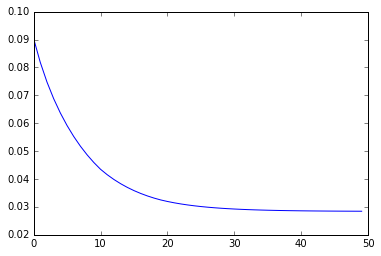

In [39]:
error500=error[1:]
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(error500)

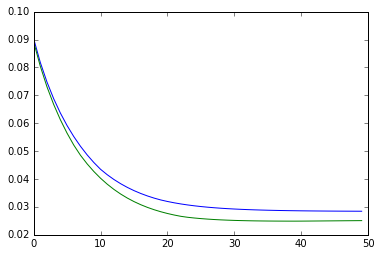

In [45]:
error1000=error[1:]
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(error500)
plt.plot(error1000)

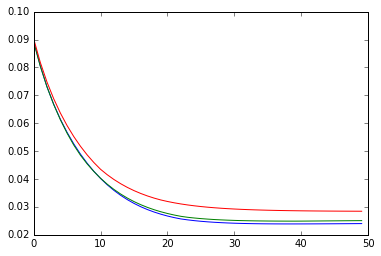

In [49]:
error2000=error[1:]
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(error2000)
plt.plot(error1000)
plt.plot(error500)

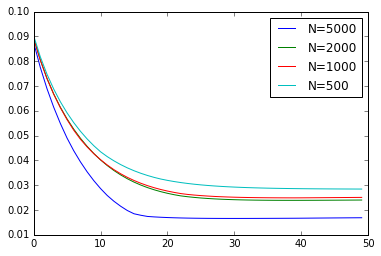

In [56]:
error5000=error[1:]
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(error5000,label='N=5000')
plt.plot(error2000,label='N=2000')
plt.plot(error1000,label='N=1000')
plt.plot(error500,label='N=500')
plt.legend()

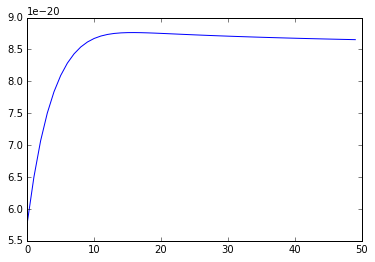

In [53]:
loglike1=loglike1[1:]
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(loglike1)

In [ ]:
Pt